# Salary Project

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

In [157]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [158]:
type(df)

pandas.core.frame.DataFrame

In [159]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [160]:
#Checking null values
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

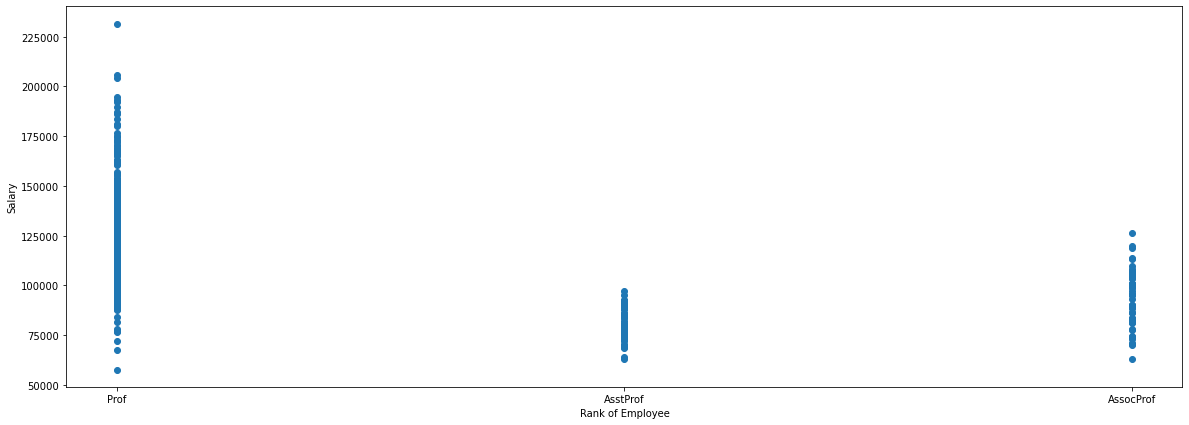

In [161]:
#Rank vs Salary

plt.scatter( df['rank'] ,df['salary'] )
plt.xlabel('Rank of Employee')
plt.ylabel('Salary')
plt.show()

**Professor rank has the highest salary**

Text(0, 0.5, 'salary')

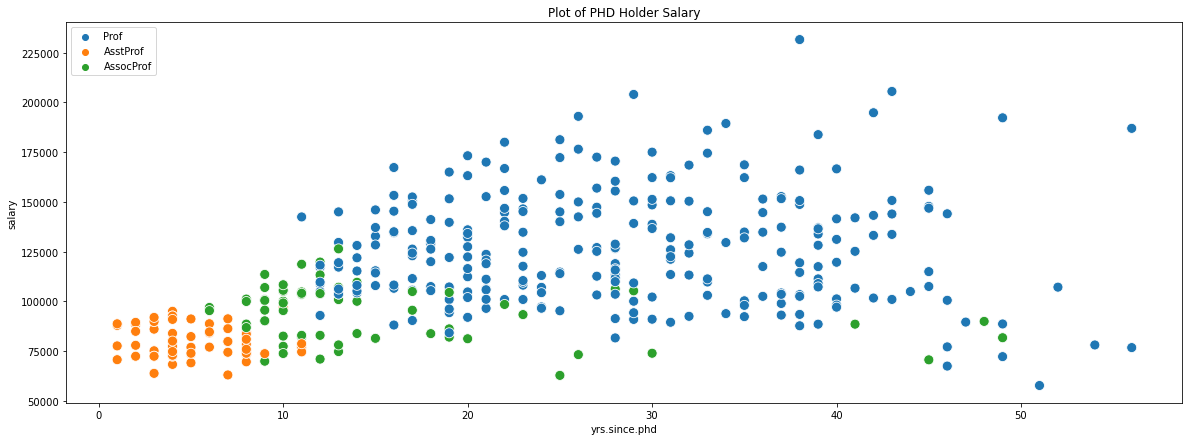

In [162]:
#PHD Scholars vs Salary
plt.title('Plot of PHD Holder Salary')
plt.rcParams['figure.figsize'] = (20, 7)
sns.scatterplot()
sns.scatterplot(x ='yrs.since.phd', y ='salary',data=df,hue='rank', s = 100)
plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('yrs.since.phd')
plt.ylabel('salary')         


Text(0, 0.5, 'salary')

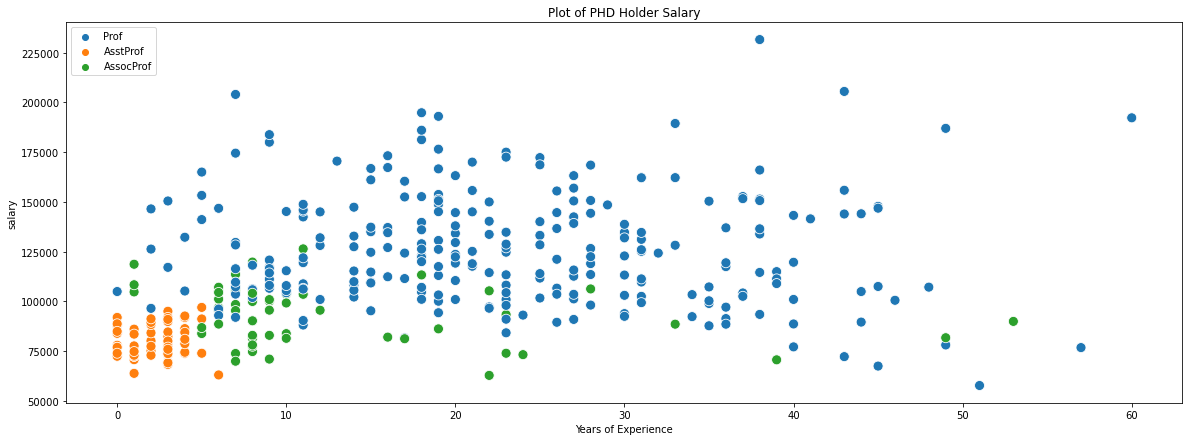

In [163]:
#PHD Scholars vs Salary
plt.title('Plot of PHD Holder Salary')
plt.rcParams['figure.figsize'] = (20, 7)
sns.scatterplot()
sns.scatterplot(x ='yrs.service', y ='salary',data=df,hue='rank', s = 100)
plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Years of Experience')
plt.ylabel('salary')        

 **Prepare data**

In [188]:
del df['sex']

In [189]:
df

,yrs.service,salary
0,18,139750
1,16,173200
2,3,79750
3,39,115000
4,41,141500
...,...,...
392,30,103106
393,19,150564
394,25,101738
395,15,95329


In [190]:
X = df.drop('salary',axis=1)
y = df['salary']

In [191]:
X.shape , y.shape

((397, 1), (397,))

In [192]:
df

,yrs.service,salary
0,18,139750
1,16,173200
2,3,79750
3,39,115000
4,41,141500
...,...,...
392,30,103106
393,19,150564
394,25,101738
395,15,95329


In [193]:
X.shape , y.shape

((397, 1), (397,))

In [194]:
##Split data into train and test
X_train , X_test , Y_train , Y_test = train_test_split(X,y,random_state=101,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((317, 1), (80, 1), (317,), (80,))

In [195]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [196]:
#Test model
pred = lr.predict(X_test)
pred

array([122583.39091848, 107907.22154907, 107907.22154907, 122583.39091848,
       105810.62592487, 112100.41279747, 103714.03030066, 114197.00842167,
       105810.62592487, 103015.1650926 , 126077.71695882, 114197.00842167,
       118390.19967008, 107907.22154907, 107907.22154907, 126077.71695882,
       107907.22154907, 108606.08675714, 106509.49113293, 114197.00842167,
       115594.73883781, 113498.14321361, 110702.68238134, 107208.356341  ,
       127475.44737495, 107208.356341  , 128873.17779109, 114895.87362974,
       123981.12133462, 108606.08675714, 119787.93008621, 126776.58216689,
       118390.19967008, 122583.39091848, 112799.27800554, 112100.41279747,
       108606.08675714, 103015.1650926 , 127475.44737495, 132367.50383142,
       119787.93008621, 101617.43467646, 120486.79529428, 105810.62592487,
       108606.08675714, 118390.19967008, 113498.14321361, 121884.52571041,
       100918.56946839, 123981.12133462, 119787.93008621, 100918.56946839,
       129572.04299915, 1

In [197]:
Y_test

38     125196
187    107500
221    145200
109    131205
91     105128
        ...  
181    141136
17     103450
89     107008
57      90215
255     83000
Name: salary, Length: 80, dtype: int64

In [198]:
#Check Actual data , Predicted data and difference between the Actual and Predicted data

diff = Y_test - pred


In [199]:
pd.DataFrame(np.c_[Y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,125196.0,122583.390918,2612.609082
1,107500.0,107907.221549,-407.221549
2,145200.0,107907.221549,37292.778451
3,131205.0,122583.390918,8621.609082
4,105128.0,105810.625925,-682.625925
...,...,...,...
75,141136.0,104412.895509,36723.104491
76,103450.0,124679.986543,-21229.986543
77,107008.0,105810.625925,1197.374075
78,90215.0,106509.491133,-16294.491133


In [200]:
#Evaluate
lr.score(X_test , Y_test)

0.16318867310008234

In [201]:
rmse = np.sqrt(mean_squared_error(Y_test,pred))
r2 = r2_score(Y_test,pred)

In [202]:
rmse , r2

(29185.06792408981, 0.16318867310008234)

In [203]:
exp = 3
lr.predict([[exp]])[0]
print(f"Salary of {exp} year experience employee = {int(lr.predict([[exp]])[0])}")

Salary of 3 year experience employee = 103015


In [204]:
exp = 5
lr.predict([[exp]])[0]
print(f"Salary of {exp} year experience employee = {int(lr.predict([[exp]])[0])}")

Salary of 5 year experience employee = 104412
